In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [8]:
#Import the three datasets
movies = pd.read_csv("movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'])
ratings = pd.read_csv("ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users = pd.read_csv("users.dat", sep="::", names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

<ipython-input-8-3f2fb1081e27>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movies = pd.read_csv("movies.dat", sep="::", names=['MovieID', 'Title', 'Genres'])
<ipython-input-8-3f2fb1081e27>:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings = pd.read_csv("ratings.dat", sep="::", names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
<ipython-input-8-3f2fb1081e27>:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='pyth

In [9]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [10]:
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [11]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [12]:
#Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. 
#(i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId
userRatings = pd.merge(users, ratings, on=['UserID'])
movieRatings = pd.merge(movies, ratings, on=['MovieID'])

In [13]:
userRatings.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp
0,1,F,1,10,48067,1193,5,978300760
1,1,F,1,10,48067,661,3,978302109
2,1,F,1,10,48067,914,3,978301968
3,1,F,1,10,48067,3408,4,978300275
4,1,F,1,10,48067,2355,5,978824291


In [14]:
movieRatings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [15]:
Master_Data = pd.merge(userRatings, movieRatings, on=['UserID', 'MovieID', 'Rating'])

In [16]:
Master_Data.head()

,UserID,Gender,Age,Occupation,Zip-code,MovieID,Rating,Timestamp_x,Title,Genres,Timestamp_y
0,1,F,1,10,48067,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,978300760
1,1,F,1,10,48067,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,978302109
2,1,F,1,10,48067,914,3,978301968,My Fair Lady (1964),Musical|Romance,978301968
3,1,F,1,10,48067,3408,4,978300275,Erin Brockovich (2000),Drama,978300275
4,1,F,1,10,48067,2355,5,978824291,"Bug's Life, A (1998)",Animation|Children's|Comedy,978824291


In [17]:
Master_Data = Master_Data[['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', "Rating"]]

In [18]:
Master_Data.head()

,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,1193,One Flew Over the Cuckoo's Nest (1975),1,1,F,10,5
1,661,James and the Giant Peach (1996),1,1,F,10,3
2,914,My Fair Lady (1964),1,1,F,10,3
3,3408,Erin Brockovich (2000),1,1,F,10,4
4,2355,"Bug's Life, A (1998)",1,1,F,10,5


In [19]:
#Explore the datasets using visual representations (graphs or tables), also include your comments on the following:
#User Age Distribution
#User rating of the movie “Toy Story”
#Top 25 movies by viewership rating
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696

<function matplotlib.pyplot.show(close=None, block=None)>

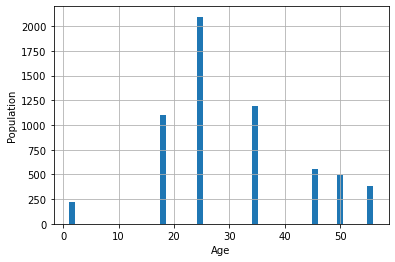

In [20]:
#User Age Distribution
users['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Population')
plt.show

Age
1     112
18    448
25    790
35    423
45    143
50    108
56     53
Name: MovieID, dtype: int64

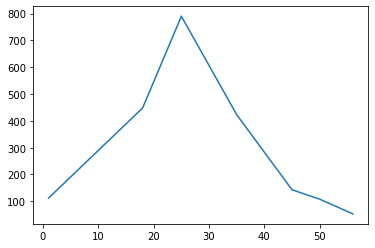

In [23]:
#User rating of the movie “Toy Story”
toy = Master_Data[Master_Data.Title == "Toy Story (1995)"]
plt.plot(toy.groupby("Age")["MovieID"].count())
toy.groupby("Age")["MovieID"].count()

<AxesSubplot:xlabel='Viewership Count', ylabel='Title'>

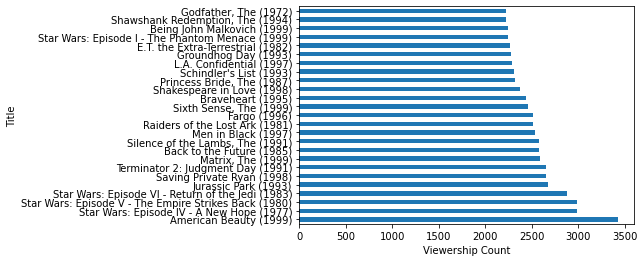

In [35]:
#Top 25 movies by viewership rating
top = Master_Data.groupby("Title").size().sort_values(ascending=False).head(25)
plt.ylabel("Title")
plt.xlabel("Viewership Count")
top.plot(kind='barh')

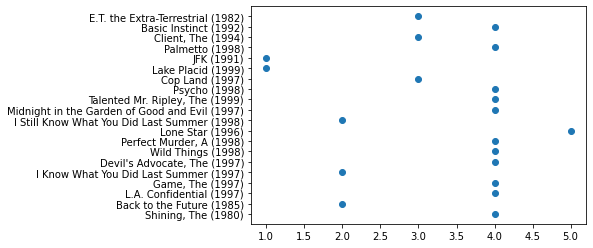

In [37]:
#Find the ratings for all the movies reviewed by for a particular user of user id = 2696
res = Master_Data[Master_Data.UserID == 2696]
plt.scatter(y=res.Title, x=res.Rating)

In [ ]:
#Feature Engineering:
#Use column genres:
#Find out all the unique genres (Hint: split the data in column genre making a list)
#process the data to find out only the unique categories of genres)
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
#Determine the features affecting the ratings of any particular movie.
#Develop an appropriate model to predict the movie ratings

In [38]:
#Use column genres:
#Find out all the unique genres (Hint: split the data in column genre making a list)
val = movies.Genres.str.split("|")

In [39]:
val.head()

0     [Animation, Children's, Comedy]
1    [Adventure, Children's, Fantasy]
2                   [Comedy, Romance]
3                     [Comedy, Drama]
4                            [Comedy]
Name: Genres, dtype: object

In [41]:
res_col = []
for v in val:
    for i in v:
        if i not in res_col:
            res_col.append(i)

In [42]:
res_col.append("Gender")
res_col.append("Age")
res_col.append("Rating")
df = pd.DataFrame(columns=res_col)
df.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating


In [48]:
res = Master_Data.merge(movies, on = ['MovieID'], how="left")[["Genres","Rating","Gender", "Age"]]

In [51]:
#Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
for index, row in res.head(20000).iterrows():
    tmp = row.Genres.split("|") 
    for i in tmp:
        df.loc[index,i] = 1
        df.loc[index,"Gender"] = res.loc[index,"Gender"]
        df.loc[index,"Age"] = res.loc[index,"Age"]
        df.loc[index,"Rating"] = res.loc[index,"Rating"]
        df.loc[index,df.columns[~df.columns.isin(tmp+["Gender","Rating","Age"])]] = 0

In [52]:
df.head()

,Animation,Children's,Comedy,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,...,Sci-Fi,Documentary,War,Musical,Mystery,Film-Noir,Western,Gender,Age,Rating
19999,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,M,25,3
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,5
1,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,F,1,3
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,F,1,4


In [55]:
#Develop an appropriate model to predict the movie ratings
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

x = df[df.columns[~df.columns.isin(["Rating"])]]
y = df.Rating
 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0) 

number = LabelEncoder()
x_train.Gender = number.fit_transform(x_train["Gender"].astype("str"))
x_test.Gender = number.fit_transform(x_test["Gender"].astype("str"))
y_train = number.fit_transform(y_train.astype("int"))
y_test = number.fit_transform(y_test.astype("int"))

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [57]:
#SVM

from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(x_train, y_train) 
svm_predictions = svm_model_linear.predict(x_test) 
  
# model accuracy for x_test   
accuracy = svm_model_linear.score(x_test, y_test) 
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, svm_predictions) 
accuracy

0.3412

In [64]:
cm

array([[134,  20,  62,  58,  13],
       [162,  15, 143, 135,  28],
       [322,  62, 428, 436,  87],
       [418,  60, 552, 541, 149],
       [233,  61, 317, 405, 159]], dtype=int64)

In [59]:
#KNN

from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(x_test, y_test) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(x_test)  
cm = confusion_matrix(y_test, knn_predictions) 

accuracy

0.3052

In [65]:
cm

array([[134,  20,  62,  58,  13],
       [162,  15, 143, 135,  28],
       [322,  62, 428, 436,  87],
       [418,  60, 552, 541, 149],
       [233,  61, 317, 405, 159]], dtype=int64)

In [61]:
#Naive Bayes classifier 

from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(x_train, y_train) 
gnb_predictions = gnb.predict(x_test) 
  
# accuracy on X_test 
accuracy = gnb.score(x_test, y_test)  
  
# creating a confusion matrix 
cm = confusion_matrix(y_test, gnb_predictions) 

accuracy

0.2554

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

# accuracy on X_test 
accuracy = lr.score(x_test, y_test) 

accuracy

0.02635611144303962